In [7]:
from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from keras.utils import np_utils
import pandas as pd

def data_spli_to_fit(data):
    data = data.drop([0],axis=1)
    data = data.drop([1],axis=1)
    data = data.drop([2],axis=1)
    data = data.drop([3],axis=1)
    data[47] = data[47].fillna('Normal')
    data[47] = data[47].replace(' Fuzzers','Fuzzers')
    data[47] = data[47].replace(' Fuzzers ','Fuzzers')
    data[47] = data[47].replace(' Reconnaissance','Reconnaissance')
    data[47] = data[47].replace(' Reconnaissance ','Reconnaissance')
    data[47] = data[47].replace(' Shellcode','Shellcode')
    data[47] = data[47].replace(' Shellcode ','Shellcode')
    data[47] = data[47].replace('Backdoors','Backdoor')
    data = data.fillna(0)
    data[39] = data[39].replace(' ',0)
    data[39] = data[39].astype('int64')
    data_2_type = data[4].unique().tolist() 
    data_3_type = data[5].unique().tolist() 
    data_4_type = data[13].unique().tolist() 
    data = data.drop([48], axis=1) #删除Label
    data[4]= data[4].apply(lambda x : data_2_type.index(x))
    data[5] = data[5].apply(lambda x : data_3_type.index(x))
    data[13] = data[13].apply(lambda x : data_4_type.index(x))
    unlabled_data = data.drop([47],axis=1)
    return(unlabled_data, pd.DataFrame(data[47]))

def data_select(data, nums=100):
    data_43_type = data[47].unique().tolist()
    print(data_43_type) 
    print(data[47].value_counts())
    data[47] = data[47].apply(lambda x : data_43_type.index(x))
    r_data = DataFrame()
        
    for x in range(10):
        tp = data[data[47] == x]
        tp = shuffle(tp)
        tp = tp.iloc[1:nums+1]
        r_data = pd.concat([r_data, tp], ignore_index=True)
    data = shuffle(r_data)
    unlabeled_data  = data.drop([47],axis=1)
    res = np_utils.to_categorical(data[47], num_classes=10)
    return (unlabeled_data, res, data_43_type)

def data_s(data, sp_num):
    data_43_type = data[47].unique().tolist()
    print(data_43_type) 
    print(data[47].value_counts())
    data[47] = data[47].apply(lambda x : data_43_type.index(x))
    train_data = DataFrame()
    test_data = DataFrame()
    for x in range(0,len(sp_num)):
        tp = data[data[47] == x]
        train_data = pd.concat([train_data, tp.iloc[1:sp_num[x]+1]], ignore_index=True)
        test_data = pd.concat([test_data, tp.iloc[sp_num[x]+1:-1]], ignore_index=True) 
    train_data = shuffle(train_data)
    test_data = shuffle(test_data)
    ub_train = train_data.drop([47],axis=1)
    ub_test = test_data.drop([47],axis=1)
    train_res = np_utils.to_categorical(train_data[47], num_classes=10)
    test_res = np_utils.to_categorical(test_data[47], num_classes=10)
    return(train_data, train_res, test_data, test_res, data_43_type)

In [8]:
data = pd.concat([pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_1.csv', header=None), \
    pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_2.csv', header=None), \
        pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_3.csv', header=None), \
            pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_4.csv', header=None)], ignore_index=True)

/tmp/ipykernel_32/583105953.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat([pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_1.csv', header=None), \
/tmp/ipykernel_32/583105953.py:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_2.csv', header=None), \


In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [10]:
(data,res) =  data_spli_to_fit(data)
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data))
data = pd.concat([data, res],axis=1)
data.info()
print(data)
sp_num = [1370880,23275,7608,8281,131435,811,13712,87,1371,1440]
(train_data, train_res, test_data, test_res, data_43_type) = data_s(data,sp_num)
#p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 44 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      float64
 32  32      float64
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64
 40  

In [11]:
print("test data is")
print(test_data,test_res)

test data is
              0         1             2         3         4         5   \
445080  0.000000  0.066667  1.024283e-09  0.000018  0.000000  0.235294   
932417  0.000000  0.066667  3.414275e-10  0.000008  0.000000  0.996078   
945856  0.000000  0.066667  1.024283e-09  0.000008  0.000000  0.996078   
929776  0.000000  0.066667  5.690459e-10  0.000008  0.000000  0.996078   
234643  0.014925  0.133333  1.167878e-04  0.000030  0.000602  0.121569   
...          ...       ...           ...       ...       ...       ...   
501814  0.014925  0.133333  1.142790e-04  0.000260  0.000373  0.121569   
166373  0.000000  0.066667  1.024283e-09  0.000018  0.000000  0.235294   
817569  0.014925  0.133333  1.703154e-06  0.000199  0.001987  0.121569   
285707  0.014925  0.133333  5.638107e-07  0.000150  0.000131  0.121569   
735985  0.014925  0.133333  6.779840e-06  0.000360  0.005951  0.121569   

              6         7         8         9   ...   34   35        36  \
445080  0.000000  0.000

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten , Activation, SimpleRNN, LSTM, GRU, Dropout, TimeDistributed, Reshape, Input, Lambda, Add
from tensorflow.keras import Sequential
model = Sequential()
model.add(Reshape((-1,1), input_shape=(44,)))
model.add(Conv1D(32, 3, activation='relu', padding='causal'))
model.add(Conv1D(64, 3, activation='relu', padding='causal'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(70,recurrent_dropout=0.1))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.005), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_res, epochs=50, batch_size=2048)
#model.summary()

Epoch 1/50
762/762 [==============================] - 78s 90ms/step - loss: 0.0329 - accuracy: 0.9610
Epoch 2/50
762/762 [==============================] - 69s 90ms/step - loss: 0.0056 - accuracy: 0.9917
Epoch 3/50
762/762 [==============================] - 69s 90ms/step - loss: 0.0037 - accuracy: 0.9960
Epoch 4/50
762/762 [==============================] - 68s 90ms/step - loss: 0.0030 - accuracy: 0.9963
Epoch 5/50
762/762 [==============================] - 68s 89ms/step - loss: 0.0025 - accuracy: 0.9969
Epoch 6/50
762/762 [==============================] - 69s 91ms/step - loss: 0.0021 - accuracy: 0.9973
Epoch 7/50
762/762 [==============================] - 69s 90ms/step - loss: 0.0018 - accuracy: 0.9978
Epoch 8/50
762/762 [==============================] - 68s 90ms/step - loss: 0.0015 - accuracy: 0.9983
Epoch 9/50
762/762 [==============================] - 68s 89ms/step - loss: 0.0014 - accuracy: 0.9984
Epoch 10/50
762/762 [==============================] - 68s 90ms/step - loss: 0.001

480/480 [==============================] - 4s 7ms/step


/opt/conda/lib/python3.10/site-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


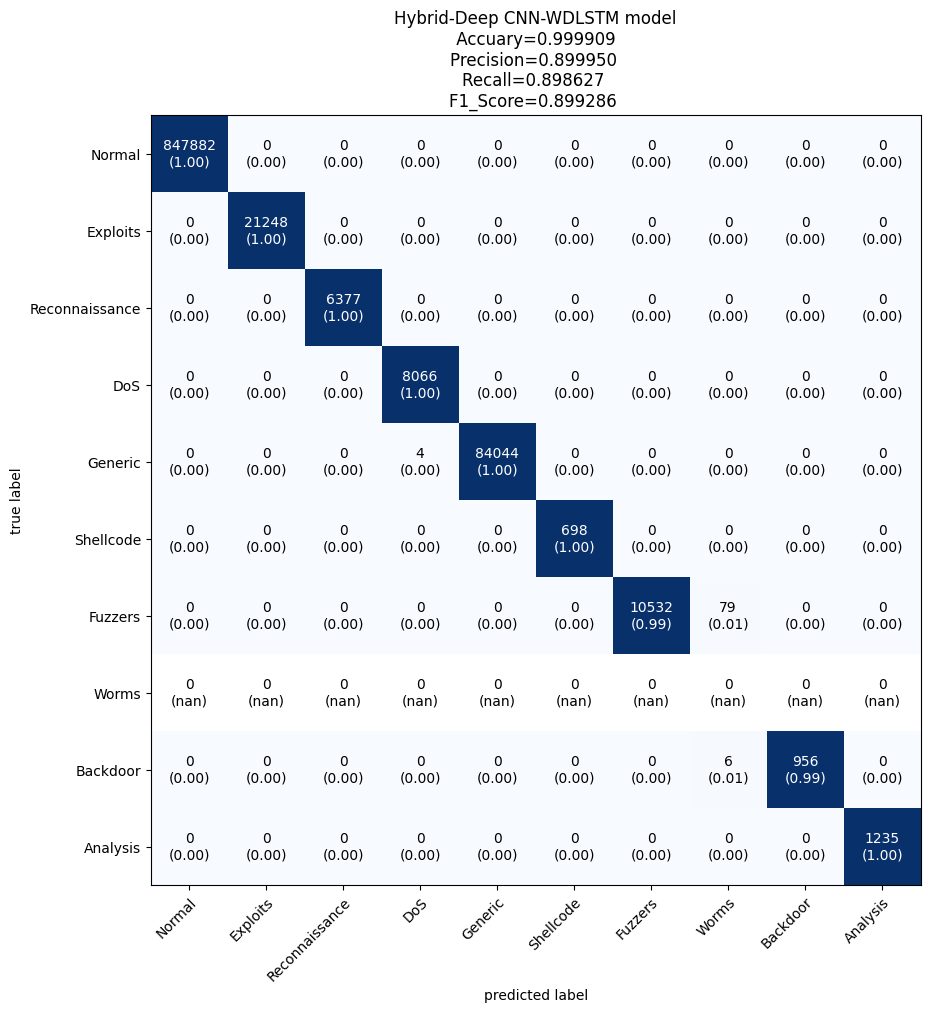

In [5]:
#model.evaluate(test_data,test_res)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

res = model.predict(test_data, batch_size=2048)
def confusion_plot(roi,res,title=None, class_name=None):
    fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix(roi,res), class_names = class_name, show_absolute=True, show_normed=True, hide_spines=False, hide_ticks=False, figsize=(10,10))
    plt.title(title+'\n Accuary=%f \nPrecision=%f \nRecall=%f \nF1_Score=%f '%(\
    accuracy_score(roi,res),\
    precision_score(roi,res, average='macro'),\
    recall_score(roi,res, average='macro'),\
    f1_score(roi,res, average='macro')\
))
    plt.show()
confusion_plot(res.argmax(axis=-1), test_res.argmax(axis=-1), 'Hybrid-Deep CNN-WDLSTM model', data_43_type)

In [6]:
from keras.models import load_model
model.save("CNN_WLSTM.h5")